In [97]:
#import dependencies
import matplotlib.pyplot as plt
import hvplot.pandas
import pandas as pd
import requests
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")


In [72]:
# Load the track and field CSV file into a Pandas DataFrame
olympic_track_data = pd.read_csv("results.csv")

olympic_track_data.head()

,Gender,Event,Location,Year,Medal,Name,Nationality,Result
0,M,10000M Men,Rio,2016,G,Mohamed FARAH,USA,25:05.2
1,M,10000M Men,Rio,2016,S,Paul Kipngetich TANUI,KEN,27:05.6
2,M,10000M Men,Rio,2016,B,Tamirat TOLA,ETH,27:06.3
3,M,10000M Men,Beijing,2008,G,Kenenisa BEKELE,ETH,27:01.2
4,M,10000M Men,Beijing,2008,S,Sileshi SIHINE,ETH,27:02.8


In [4]:
# Load the athlete events CSV file into a Pandas DataFrame
olympic_athletes_data = pd.read_csv("athlete_events.csv")

olympic_athletes_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [8]:
# Load the NOC CSV file into a Pandas DataFrame
NOC_data = pd.read_csv("noc_regions.csv")

NOC_data.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [101]:
distance_df = olympic_track_data.loc[(olympic_track_data['Event']=="10000M Men") | (olympic_track_data['Event']=="10000M Women")|
                                     (olympic_track_data['Event']=="1500M Women")|(olympic_track_data['Event']=="1500M Men") |
                                     (olympic_track_data['Event']=="3000M Women")|(olympic_track_data['Event']=="3000M Men") |
                                     (olympic_track_data['Event']=="4x400M Women")|(olympic_track_data['Event']=="4x400M Men") |
                                     (olympic_track_data['Event']=="5000M Women") | (olympic_track_data['Event']=="5000M Men")|
                                     (olympic_track_data['Event']=="800M Women") | (olympic_track_data['Event']=="800M Men") ]

#long_distance_df = olympic_track_data[(olympic_track_data['Event']=="Marathon Men") |(olympic_track_data['Event']=="Marathon Women")]
 

distance_df.head()

,Gender,Event,Location,Year,Medal,Name,Nationality,Result
0,M,10000M Men,Rio,2016,G,Mohamed FARAH,USA,25:05.2
1,M,10000M Men,Rio,2016,S,Paul Kipngetich TANUI,KEN,27:05.6
2,M,10000M Men,Rio,2016,B,Tamirat TOLA,ETH,27:06.3
3,M,10000M Men,Beijing,2008,G,Kenenisa BEKELE,ETH,27:01.2
4,M,10000M Men,Beijing,2008,S,Sileshi SIHINE,ETH,27:02.8


# The long distance race walks and marathon results often have fractions of seconds included, but not always.  When they are included, the results seem to not show the hours at the beginning.  This needs to be addressed to have consistent data for these races.

# Split the time strings into hours,minutes, seconds for long distance races

long_distance_df = long_distance_df.dropna(how="any")

long_seconds_result = []
hours = ""
minutes = ""
seconds = ""

for result in long_distance_df['Result']:
    try:
        time = datetime.strptime(result,"%H:%M.%S")
    except ValueError:
        print("There was a time that didn't fit the format")
    except TypeError:
        print("There was a time that didn't fit the format")
        

# Convert the components to integers
    hours = time.hour
    minutes = time.minute
    seconds = time.second
    long_total_seconds = hours * 3600 + minutes * 60 + seconds

    long_seconds_result.append(long_total_seconds)

distance_df['Time(s)']=long_seconds_result

In [102]:
# Split the time strings into minutes, seconds, and hundredths for distance races

distance_df = distance_df.dropna(how="any")

seconds_result = []
minutes = ""
seconds = ""

for result in distance_df['Result']:
    try:
        time = datetime.strptime(result,"%M:%S.%f")
    except ValueError:
        print("There was a time that didn't fit the format")
    except TypeError:
        print("There was a time that didn't fit the format")
        

# Convert the components to integers
    minutes = time.minute
    seconds = time.second
    hundredths = time.microsecond
    total_seconds = minutes * 60 + seconds
    total_time = float(total_seconds) + hundredths/1000000

    seconds_result.append(total_time)

distance_df['Time']=seconds_result

distance_df.tail()


,Gender,Event,Location,Year,Medal,Name,Nationality,Result,Time
2064,W,800M Women,Munich,1972,B,Gunhild HOFFMEISTER,GDR,01:59.2,119.2
2065,W,800M Women,Tokyo,1964,G,Ann PACKER,GBR,02:01.1,121.1
2066,W,800M Women,Tokyo,1964,S,Maryvonne DUPUREUR,FRA,02:01.9,121.9
2067,W,800M Women,Tokyo,1964,B,Ann Marise CHAMBERLAIN,NZL,02:02.8,122.8
2068,W,800M Women,Amsterdam,1928,G,"Karoline ""Lina"" RADKE",GER,02:16.8,136.8


In [104]:
ten_thousand_m_df = distance_df.loc[(distance_df['Event']=='10000M Women')|(distance_df['Event']=='10000M Men')]

ten_thousand_m_df.tail()

,Gender,Event,Location,Year,Medal,Name,Nationality,Result,Time
1648,W,10000M Women,Athens,2004,S,Ejegayehu DIBABA,ETH,30:25.0,1825.0
1649,W,10000M Women,Athens,2004,B,Derartu TULU,ETH,30:26.4,1826.4
1650,W,10000M Women,Atlanta,1996,G,Fernanda RIBEIRO,POR,31:01.6,1861.6
1651,W,10000M Women,Atlanta,1996,S,Junxia WANG,CHN,31:02.6,1862.6
1652,W,10000M Women,Atlanta,1996,B,Gete WAMI,ETH,31:06.6,1866.6


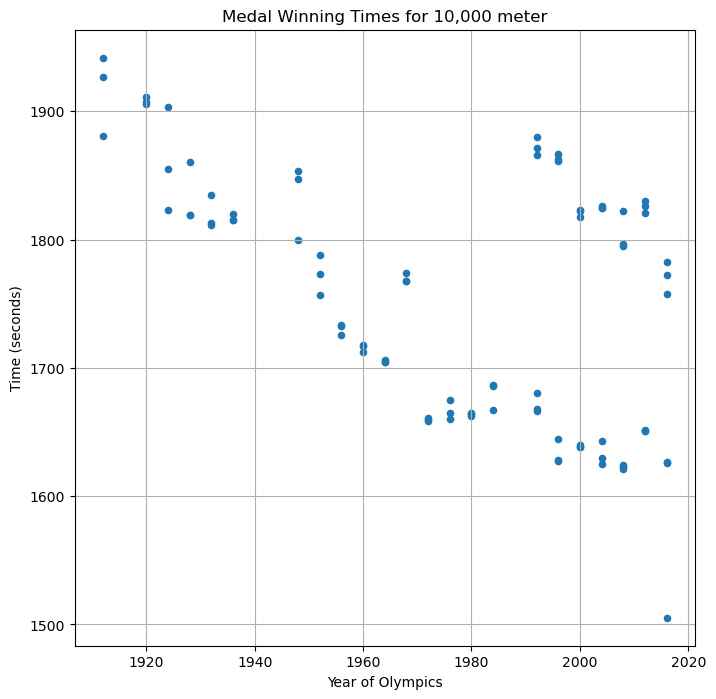

In [111]:
# Create the scatter plot
ten_thousand_m_df.plot(kind="scatter", x="Year", y="Time", grid=True, figsize=(8,8),
              title="Medal Winning Times for 10,000 meter",xlabel = "Year of Olympics", ylabel = "Time (seconds)")

# Show the plot
plt.show()

In [ ]:
# Build scatter plot for Time result vs. Year of Olympics
distance_df.plot(kind="scatter", x="Year", y="Time", grid=True, figsize=(8,8),
              title="Medal Winning Times for Mens 10,000 meter",xlabel = "Year of Olympics", ylabel = "Time (seconds)")

Dist_events = ['10000 M Men', '10000M Women','1500M Women','1500M Men','3000M Women','3000M Men',"4x400M Women","4x400M Men",
               '5000M Women','5000M Men','800M Women','800M Men']

count = 0
for event in Dist_events:
    
    event_count_df = distance_df.loc[distance_df[event]]
    
    event_count_df.plot(kind="scatter", x="Year", y="Time", grid=True, figsize=(8,8),
              title=(f'Medal Winning Times for ', event ),xlabel = "Year of Olympics", ylabel = "Time (seconds)")
    count += 1




# Incorporate the other graph properties
# YOUR CODE HERE
